In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import kagglehub
path = kagglehub.dataset_download("sanjeetsinghnaik/google-recaptcha")

print("Path to dataset files:", path)

Saving kaggle.json to kaggle.json


100%|██████████| 392M/392M [00:03<00:00, 135MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1


In [3]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 853.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00


In [12]:
import os
import random
from pathlib import Path
from IPython.display import display
from PIL import Image
import torch
from ultralytics import YOLO

DATASET_PATH = '/root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1'
NUM_SAMPLES = 5
RESULTS_DIR = 'recaptcha_results'
os.makedirs(RESULTS_DIR, exist_ok=True)

In [13]:
def get_image_paths(dataset_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    return [str(p) for p in Path(dataset_path).rglob("*") if p.suffix.lower() in image_extensions]

image_paths = get_image_paths(DATASET_PATH)
print(f"total number of images: {len(image_paths)}")

total number of images: 11730


In [14]:
model = YOLO('yolov5s.pt')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [21]:
selected_paths = random.sample(image_paths, NUM_SAMPLES)
detection_results = []

for img_path in selected_paths:
    results = model(img_path)
    labels = results[0].names
    boxes = results[0].boxes
    detected_objects = [labels[int(cls)] for cls in boxes.cls]

    output_path = os.path.join(RESULTS_DIR, os.path.basename(img_path))
    im_plot = results[0].plot()
    Image.fromarray(im_plot).save(output_path)

    detection_results.append({
        "image": img_path,
        "objects": detected_objects,
        "output": output_path
    })


image 1/1 /root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1/data/train/Car/Car (2239).png: 640x640 2 cars, 853.9ms
Speed: 16.4ms preprocess, 853.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1/data/train/Crosswalk/Cross (664).png: 640x640 1 car, 806.8ms
Speed: 7.5ms preprocess, 806.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1/data/test/Crosswalk/Cross (85).png: 640x640 1 car, 570.5ms
Speed: 7.4ms preprocess, 570.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/sanjeetsinghnaik/google-recaptcha/versions/1/data/test/Car/Car (402).png: 640x640 2 cars, 1 truck, 2 traffic lights, 504.7ms
Speed: 6.7ms preprocess, 504.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



 number of image:1 Car (2239).png
 Detected objects: ['car', 'car']
 output path: recaptcha_results/Car (2239).png


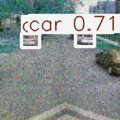


 number of image:2 Cross (664).png
 Detected objects: ['car']
 output path: recaptcha_results/Cross (664).png


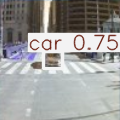


 number of image:3 Cross (85).png
 Detected objects: ['car']
 output path: recaptcha_results/Cross (85).png


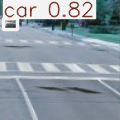


 number of image:4 Car (402).png
 Detected objects: ['car', 'traffic light', 'traffic light', 'car', 'truck']
 output path: recaptcha_results/Car (402).png


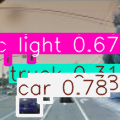


 number of image:5 Bus (72).png
 Detected objects: ['bus', 'train']
 output path: recaptcha_results/Bus (72).png


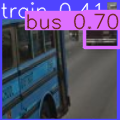

In [23]:
for idx, result in enumerate(detection_results, 1):
    print(f"\n number of image:{idx} {os.path.basename(result['image'])}")
    print(f" Detected objects: {result['objects']}")
    print(f" output path: {result['output']}")
    display(Image.open(result["output"]))